<a href="https://colab.research.google.com/github/Aliahmadjangohar/Aliahmadjangohar/blob/main/Credit_Score_Prediction_Using_LSTM_and_SHAP_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Load the  dataset
data = pd.read_csv('/content/Creditscore_train_cleaned.csv')
# Display the first few rows of the data
print("Data:")
print(data.head())


Data:
   Age Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0   23  Scientist       19114.12                  3                4   
1   23  Scientist       19114.12                  3                4   
2   23  Scientist       19114.12                  3                4   
3   23  Scientist       19114.12                  3                4   
4   23  Scientist       19114.12                  3                4   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0              3            4                    3                7.000000   
1              3            4                    5                4.000000   
2              3            4                    6               31.202764   
3              3            4                    8                4.000000   
4              3            4                    3                8.000000   

   Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                   4.0    Unknown  

In [ ]:
# Check for missing values in the  dataset
print("\nMissing values in dataset:")
print(data.isnull().sum())




Missing values in dataset:
Age                          0
Occupation                   0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64


In [ ]:
# Handle Categorical Data: Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
for col in ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']:
    data[col] = label_encoder.fit_transform(data[col])

# Feature Scaling: Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
                      'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                      'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                      'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly',
                      'Monthly_Balance', 'Credit_History_Age_Months']

data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the processed data
print("\nProcessed Data:")
print(data.head())


Processed Data:
        Age  Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0 -0.953742          13      -0.109941          -0.120388        -0.143323   
1 -0.953742          13      -0.109941          -0.120388        -0.143323   
2 -0.953742          13      -0.109941          -0.120388        -0.143323   
3 -0.953742          13      -0.109941          -0.120388        -0.143323   
4 -0.953742          13      -0.109941          -0.120388        -0.143323   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0       -0.14903    -0.052201            -1.236515               -0.110952   
1       -0.14903    -0.052201            -1.101396               -0.124704   
2       -0.14903    -0.052201            -1.033836               -0.000010   
3       -0.14903    -0.052201            -0.898717               -0.124704   
4       -0.14903    -0.052201            -1.236515               -0.106368   

   Num_Credit_Inquiries  Credit_Mix  Outstand

In [ ]:
#Separate features and target variable
X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Reshape data to fit LSTM input requirements
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
1846/1846 [==============================] - 22s 9ms/step - loss: 0.3513 - mean_absolute_error: 0.4823 - val_loss: 0.3131 - val_mean_absolute_error: 0.4566
Epoch 2/100
1846/1846 [==============================] - 13s 7ms/step - loss: 0.3173 - mean_absolute_error: 0.4528 - val_loss: 0.3060 - val_mean_absolute_error: 0.4377
Epoch 3/100
1846/1846 [==============================] - 15s 8ms/step - loss: 0.3120 - mean_absolute_error: 0.4431 - val_loss: 0.3027 - val_mean_absolute_error: 0.4356
Epoch 4/100
1846/1846 [==============================] - 14s 7ms/step - loss: 0.3081 - mean_absolute_error: 0.4393 - val_loss: 0.3016 - val_mean_absolute_error: 0.4431
Epoch 5/100
1846/1846 [==============================] - 13s 7ms/step - loss: 0.3061 - mean_absolute_error: 0.4377 - val_loss: 0.3005 - val_mean_absolute_error: 0.4352
Epoch 6/100
1846/1846 [==============================] - 13s 7ms/step - loss: 0.3044 - mean_absolute_error: 0.4349 - val_loss: 0.3008 - val_mean_absolute_error:

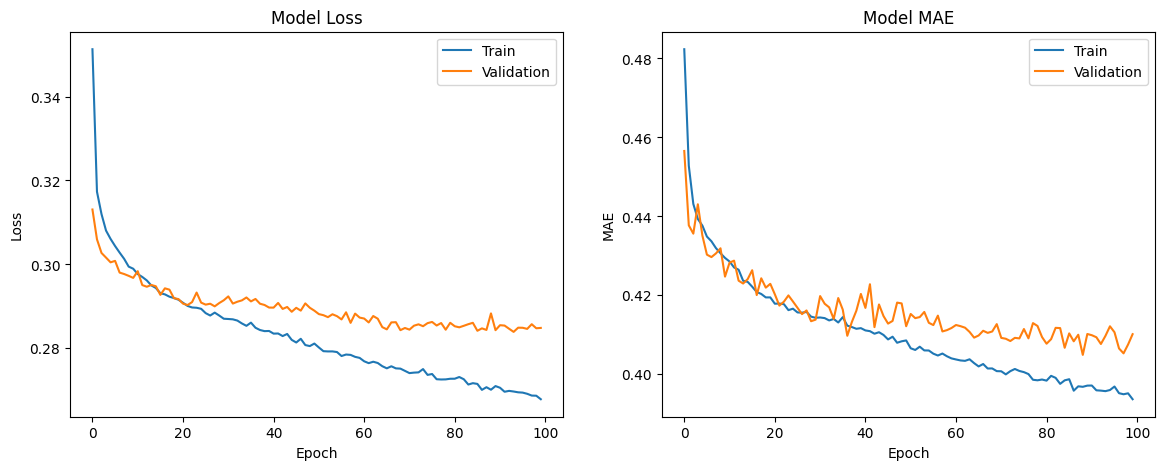

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [ ]:
new_data = pd.read_csv('/content/Creditscore_test_cleaned.csv')

# Display the first few rows of the new data
print("New Data:")
print(new_data.head())

New Data:
   Age Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0   23  Scientist       19114.12                  3                4   
1   24  Scientist       19114.12                  3                4   
2   24  Scientist       19114.12                  3                4   
3   28      Other       34847.84                  2                4   
4   28    Teacher       34847.84                  2                4   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0              3            4                    3                     7.0   
1              3            4                    3                     9.0   
2              3            4                    4                     5.0   
3              6            1                    3                     1.0   
4              6            1                    3                     3.0   

   Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                2022.0       Go

In [ ]:
# Handle Categorical Data: Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
for col in ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']:
    new_data[col] = label_encoder.fit_transform(new_data[col])

# Feature Scaling: Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
                      'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                      'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                      'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly',
                      'Monthly_Balance', 'Credit_History_Age_Months']

new_data[numerical_features] = scaler.fit_transform(new_data[numerical_features])

# Display the first few rows of the processed data
print("\nProcessed Data:")
print(data.head())


Processed Data:
        Age  Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0 -0.953742          13      -0.109941          -0.120388        -0.143323   
1 -0.953742          13      -0.109941          -0.120388        -0.143323   
2 -0.953742          13      -0.109941          -0.120388        -0.143323   
3 -0.953742          13      -0.109941          -0.120388        -0.143323   
4 -0.953742          13      -0.109941          -0.120388        -0.143323   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0       -0.14903    -0.052201            -1.236515               -0.110952   
1       -0.14903    -0.052201            -1.101396               -0.124704   
2       -0.14903    -0.052201            -1.033836               -0.000010   
3       -0.14903    -0.052201            -0.898717               -0.124704   
4       -0.14903    -0.052201            -1.236515               -0.106368   

   Num_Credit_Inquiries  Credit_Mix  Outstand

In [ ]:
# Reshape data to fit LSTM input requirements
X_new = new_data.values.reshape((new_data.shape[0], 1, new_data.shape[1]))

In [ ]:


# Predict credit scores
predicted_credit_scores = model.predict(X_new)

# Display the predicted credit scores
new_data['Predicted_Credit_Score'] = predicted_credit_scores
print("\nPredicted Credit Scores:")
print(new_data[['Predicted_Credit_Score']])


Predicted Credit Scores:
       Predicted_Credit_Score
0                    1.348611
1                    1.487645
2                    1.476551
3                    1.442000
4                    1.444830
...                       ...
46115                0.655894
46116                1.062072
46117                0.221953
46118                0.249933
46119                0.912960

[46120 rows x 1 columns]


In [ ]:
!pip install tensorflow==2.8.0 keras==2.8.0 shap==0.39.0


In [ ]:
import shap

# Ensure new_data only contains the 19 expected features
expected_features = 19
new_data = new_data.iloc[:, :expected_features]
# Select a subset of 5 rows for new_data
subset_size = 5
new_data_subset = new_data.iloc[:subset_size, :]
# Check the shape of X_train to ensure it fits the LSTM input requirements
print(f"Original X_train shape: {X_train.shape}")


Original X_train shape: (73828, 1, 19)


In [ ]:
# Ensure X_train has the correct shape
if X_train.ndim == 3 and X_train.shape[2] == expected_features:
    reshaped_X_train = X_train
else:
    raise ValueError("X_train does not have the expected shape of (num_samples, 1, num_features).")


In [ ]:
# Select a subset of 5 rows for X_train
X_train_subset = reshaped_X_train[:subset_size, :, :]

# Initialize the GradientExplainer with the model and the subset of the training data
explainer = shap.GradientExplainer(model, X_train_subset)

# Compute SHAP values for the new data
shap_values_new = explainer.shap_values(X_new)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
# Convert the SHAP values to match the 2D shape for visualization
shap_values_new_2D = [sv.reshape((sv.shape[0], sv.shape[2])) for sv in shap_values_new]


In [ ]:
# Convert the new data back to its original 2D shape for SHAP visualization
X_new_2D = X_new.reshape(X_new.shape[0], X_new.shape[2])

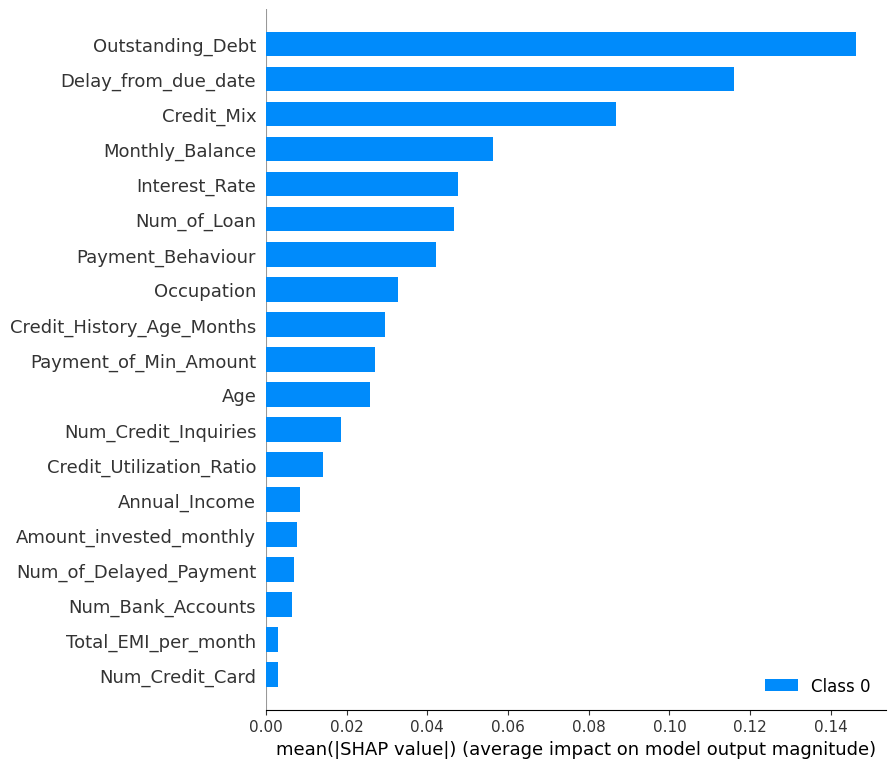

In [ ]:
# Plot the summary plot for the new data
shap.summary_plot(shap_values_new_2D, X_new_2D, feature_names=new_data_subset.columns)
